# Data Clean
### Takes data labels it, and breaks it into one second chunks
#### David Saffo
#### 5/16/2017

In [1]:
import pandas as pd
import itertools
import numpy as np
from io import StringIO
import math
import scipy.stats.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [2]:
giaWalking = pd.read_csv("Gia Walking Hopefully.csv", header = None, skiprows = 2)
giaRunning = pd.read_csv("Gia Running.csv", header = None, skiprows = 2)
giaSitting = pd.read_csv("Gia Sitting.csv", header = None, skiprows = 2)
giaSleeping = pd.read_csv("Gia Sleeping.csv", header = None, skiprows = 2)
giaStanding = pd.read_csv("Gia Standing.csv", header = None, skiprows = 2)
giaClimbing = pd.read_csv("Gia Climbing.csv", header = None, skiprows = 2)
ilonaWalking = pd.read_csv("Ilona Walking.csv", header = None, skiprows = 2)
ilonaRunning = pd.read_csv("Ilona Running.csv", header = None, skiprows = 2)
ilonaSitting = pd.read_csv("Ilona Sitting.csv", header = None, skiprows = 2)
ilonaSleeping = pd.read_csv("Ilona Sleeping.csv", header = None, skiprows = 2)
ilonaStanding = pd.read_csv("Ilona Standing.csv", header = None, skiprows = 2)
ilonaClimbing = pd.read_csv("Ilona Climbing.csv", header = None, skiprows = 2)
liliWalking = pd.read_csv("Lili Walking.csv", header = None, skiprows = 2)
liliRunning = pd.read_csv("Lili Running.csv", header = None, skiprows = 2)
liliSitting = pd.read_csv("Lili Sitting.csv", header = None, skiprows = 2)
liliSleeping = pd.read_csv("Lili Sleeping.csv", header = None, skiprows = 2)
liliStanding = pd.read_csv("Lili Standing.csv", header = None, skiprows = 2)
liliClimbing = pd.read_csv("Lili Climbing.csv", header = None, skiprows = 2)
chrisWalking = pd.read_csv("Chris Walking.csv", header = None, skiprows = 2)
chrisRunning = pd.read_csv("Chris Running.csv", header = None, skiprows = 2)
chrisSitting = pd.read_csv("Chris Sitting.csv", header = None, skiprows = 2)
chrisSleeping = pd.read_csv("Chris Sleeping.csv", header = None, skiprows = 2)
chrisStanding = pd.read_csv("Chris Standing.csv", header = None, skiprows = 2)
chrisClimbing = pd.read_csv("Chris Climbing.csv", header = None, skiprows = 2)
davidWalking = pd.read_csv("David Walking.csv", header = None, skiprows = 2)
davidRunning = pd.read_csv("David Running.csv", header = None, skiprows = 2)
davidSitting = pd.read_csv("David Sitting.csv", header = None, skiprows = 2)
davidSleeping = pd.read_csv("David Sleeping.csv", header = None, skiprows = 2)
davidStanding = pd.read_csv("David Standing.csv", header = None, skiprows = 2)
davidClimbing = pd.read_csv("David Climbing.csv", header = None, skiprows = 2)
juliaWalking = pd.read_csv("Julia Walking.csv", header = None, skiprows = 2)
juliaRunning = pd.read_csv("Julia Running.csv", header = None, skiprows = 2)
juliaSitting = pd.read_csv("Julia Sitting.csv", header = None, skiprows = 2)
juliaSleeping = pd.read_csv("Julia Sleeping.csv", header = None, skiprows = 2)
juliaStanding = pd.read_csv("Julia Standing.csv", header = None, skiprows = 2)
juliaClimbing = pd.read_csv("Julia Climbing.csv", header = None, skiprows = 2)
noelWalking = pd.read_csv("Noel Walking.csv", header = None, skiprows = 2)
noelRunning = pd.read_csv("Noel Running.csv", header = None, skiprows = 2)
noelSitting = pd.read_csv("Noel Sitting.csv", header = None, skiprows = 2)
noelSleeping = pd.read_csv("Noel Sleeping.csv", header = None, skiprows = 2)
noelStanding = pd.read_csv("Noel Standing.csv", header = None, skiprows = 2)
noelClimbing = pd.read_csv("Noel Climbing.csv", header = None, skiprows = 2)
katieWalking = pd.read_csv("Katie Walking.csv", header = None, skiprows = 2)
katieRunning = pd.read_csv("Katie Running.csv", header = None, skiprows = 2)
katieSitting = pd.read_csv("Katie Sitting.csv", header = None, skiprows = 2)
katieSleeping = pd.read_csv("Katie Sleeping.csv", header = None, skiprows = 2)
katieStanding = pd.read_csv("Katie Standing.csv", header = None, skiprows = 2)
katieClimbing = pd.read_csv("Katie Climbing.csv", header = None, skiprows = 2)
deneeWalking = pd.read_csv("Denee Walking.csv", header = None, skiprows = 2)
deneeRunning = pd.read_csv("Denee Running.csv", header = None, skiprows = 2)
deneeSitting = pd.read_csv("Denee Sitting.csv", header = None, skiprows = 2)
deneeSleeping = pd.read_csv("Denee Sleeping.csv", header = None, skiprows = 2)
deneeStanding = pd.read_csv("Denee Standing.csv", header = None, skiprows = 2)
deneeClimbing = pd.read_csv("Denee Climbing.csv", header = None, skiprows = 2)

In [3]:
def createDF(sub, act, data):
    data = data.drop(4,1)
    x = 0
    i = 0
    array = []
    d = []
    for index, row in data.iterrows():
        if (data.iloc[index,0] % 5 != 0):
            array.append([data.iloc[index,1],data.iloc[index,2],data.iloc[index,3]])
        elif (data.iloc[index,0] % 5 == 0):
            d.append([sub , act, array])
            array = []
            i+=1

    d.pop(0)
    d.pop(-1)
    

    dftest = pd.DataFrame(d)
    
    return dftest

In [4]:
df = createDF("gia", "walking", giaWalking)
df = df.append(createDF("gia", "running", giaRunning), ignore_index=True)
df = df.append(createDF("gia", "sleeping", giaSleeping), ignore_index=True)
df = df.append(createDF("gia", "climbing", giaClimbing), ignore_index=True)
df = df.append(createDF("gia", "sitting", giaSitting), ignore_index=True)
df = df.append(createDF("gia", "standing", giaStanding), ignore_index=True)

df = df.append(createDF("ilona", "walking", ilonaWalking), ignore_index=True)
df = df.append(createDF("ilona", "running", ilonaRunning), ignore_index=True)
df = df.append(createDF("ilona", "sleeping", ilonaSleeping), ignore_index=True)
df = df.append(createDF("ilona", "climbing", ilonaClimbing), ignore_index=True)
df = df.append(createDF("ilona", "sitting", ilonaSitting), ignore_index=True)
df = df.append(createDF("ilona", "standing", ilonaStanding), ignore_index=True)

df = df.append(createDF("lili", "walking", liliWalking), ignore_index=True)
df = df.append(createDF("lili", "running", liliRunning), ignore_index=True)
df = df.append(createDF("lili", "sleeping", liliSleeping), ignore_index=True)
df = df.append(createDF("lili", "climbing", liliClimbing), ignore_index=True)
df = df.append(createDF("lili", "sitting", liliSitting), ignore_index=True)
df = df.append(createDF("lili", "standing", liliStanding), ignore_index=True)
               
df = df.append(createDF("chris", "walking", chrisWalking), ignore_index=True)
df = df.append(createDF("chris", "running", chrisRunning), ignore_index=True)
df = df.append(createDF("chris", "sleeping", chrisSleeping), ignore_index=True)
df = df.append(createDF("chris", "climbing", chrisClimbing), ignore_index=True)
df = df.append(createDF("chris", "sitting", chrisSitting), ignore_index=True)
df = df.append(createDF("chris", "standing", chrisStanding), ignore_index=True)

df = df.append(createDF("david", "walking", davidWalking), ignore_index=True)
df = df.append(createDF("david", "running", davidRunning), ignore_index=True)
df = df.append(createDF("david", "sleeping", davidSleeping), ignore_index=True)
df = df.append(createDF("david", "climbing", davidClimbing), ignore_index=True)
df = df.append(createDF("david", "sitting", davidSitting), ignore_index=True)
df = df.append(createDF("david", "standing", davidStanding), ignore_index=True)

df = df.append(createDF("julia", "walking", juliaWalking), ignore_index=True)
df = df.append(createDF("julia", "running", juliaRunning), ignore_index=True)
df = df.append(createDF("julia", "sleeping", juliaSleeping), ignore_index=True)
df = df.append(createDF("julia", "climbing", juliaClimbing), ignore_index=True)
df = df.append(createDF("julia", "sitting", juliaSitting), ignore_index=True)
df = df.append(createDF("julia", "standing", juliaStanding), ignore_index=True)

df = df.append(createDF("noel", "walking", noelWalking), ignore_index=True)
df = df.append(createDF("noel", "running", noelRunning), ignore_index=True)
df = df.append(createDF("noel", "sleeping", noelSleeping), ignore_index=True)
df = df.append(createDF("noel", "climbing", noelClimbing), ignore_index=True)
df = df.append(createDF("noel", "sitting", noelSitting), ignore_index=True)
df = df.append(createDF("noel", "standing", noelStanding), ignore_index=True)

df = df.append(createDF("katie", "walking", katieWalking), ignore_index=True)
df = df.append(createDF("katie", "running", katieRunning), ignore_index=True)
df = df.append(createDF("katie", "sleeping", katieSleeping), ignore_index=True)
df = df.append(createDF("katie", "climbing", katieClimbing), ignore_index=True)
df = df.append(createDF("katie", "sitting", katieSitting), ignore_index=True)
df = df.append(createDF("katie", "standing", katieStanding), ignore_index=True)

df = df.append(createDF("denee", "walking", deneeWalking), ignore_index=True)
df = df.append(createDF("denee", "running", deneeRunning), ignore_index=True)
df = df.append(createDF("denee", "sleeping", deneeSleeping), ignore_index=True)
df = df.append(createDF("denee", "climbing", deneeClimbing), ignore_index=True)
df = df.append(createDF("denee", "sitting", deneeSitting), ignore_index=True)
df = df.append(createDF("denee", "standing", deneeStanding), ignore_index=True)

In [5]:
temp = []
a = []
mag = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    mag = []
    for j in range(len(temp)):
        x = temp[j][0]
        y = temp[j][1]
        z = temp[j][2]
    
        magnitude = math.sqrt(x ** 2 + y ** 2 + z ** 2)
        
        mag.append(magnitude)
       
    a.append(mag)

df.insert(3, "magnitude", a)

In [6]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    Max = max(temp)
       
    a.append(Max)

df.insert(4, "max", a)

In [7]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    Min = min(temp)
       
    a.append(Min)

df.insert(5, "min", a)

In [8]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    std = np.std(x)
    a.append(std)

df.insert(6, "std", a)

In [9]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    skew = stats.skew(temp)
    a.append(skew)

df.insert(7, "skew", a)

In [10]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    kurt = stats.kurtosis(temp)
    a.append(kurt)

df.insert(8, "kurtosis", a)

In [11]:
temp = []
a = []


for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    Mean = np.mean(x)
    a.append(Mean)

df.insert(9, "mean", a)

In [12]:
temp = []
a = []

for i in range(len(df)):
    temp = df.iloc[i,3]
    x = np.array(temp)
    Median = np.median(x)
    a.append(Median)

df.insert(10, "median", a)

In [13]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x.append(max(tempx))
    y.append(max(tempy))
    z.append(max(tempz))
    tempx = []
    tempy = []
    tempz = []

df.insert(11, "x max", x)
df.insert(12, "y max", y)
df.insert(13, "z max", z)

In [14]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x.append(min(tempx))
    y.append(min(tempy))
    z.append(min(tempz))
    tempx = []
    tempy = []
    tempz = []

df.insert(14, "x min", x)
df.insert(15, "y min", y)
df.insert(16, "z min", z)

In [15]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    meanx = np.array(tempx)
    meany = np.array(tempy)
    meanz = np.array(tempz)
    x.append(np.mean(meanx))
    y.append(np.mean(meany))
    z.append(np.mean(meanz))
    tempx = []
    tempy = []
    tempz = []

df.insert(17, "x mean", x)
df.insert(18, "y mean", y)
df.insert(19, "z mean", z)

In [16]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    medianx = np.array(tempx)
    mediany = np.array(tempy)
    medianz = np.array(tempz)
    x.append(np.median(medianx))
    y.append(np.median(mediany))
    z.append(np.median(medianz))
    tempx = []
    tempy = []
    tempz = []

df.insert(20, "x median", x)
df.insert(21, "y median", y)
df.insert(22, "z median", z)

In [17]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x.append(stats.skew(tempx))
    y.append(stats.skew(tempy))
    z.append(stats.skew(tempz))
    tempx = []
    tempy = []
    tempz = []

df.insert(23, "x skew", x)
df.insert(24, "y skew", y)
df.insert(25, "z skew", z)

In [18]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x.append(stats.kurtosis(tempx))
    y.append(stats.kurtosis(tempy))
    z.append(stats.kurtosis(tempz))
    tempx = []
    tempy = []
    tempz = []

df.insert(26, "x kurtosis", x)
df.insert(27, "y kurtosis", y)
df.insert(28, "z kurtosis", z)

In [19]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    
    stdx = np.array(tempx)
    stdy = np.array(tempy)
    stdz = np.array(tempz)
    x.append(np.std(stdx))
    y.append(np.std(stdy))
    z.append(np.std(stdz))
    tempx = []
    tempy = []
    tempz = []

df.insert(29, "x std", x)
df.insert(30, "y std", y)
df.insert(31, "z std", z)

In [20]:
temp = []
tempx = []
tempy = []
tempz = []
xy = []
yz = []
xz = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x = np.array(tempx)
    y = np.array(tempy)
    z = np.array(tempz)
    
    xy.append(np.mean(x * y))
    yz.append(np.mean(y * z))
    xz.append(np.mean(x * z))
    tempx = []
    tempy = []
    tempz = []

df.insert(32, "xy mean", xy)
df.insert(33, "yz mean", yz)
df.insert(34, "xz mean", xz)

499
499


C:\Users\dsaffo\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\dsaffo\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\dsaffo\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\Users\dsaffo\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


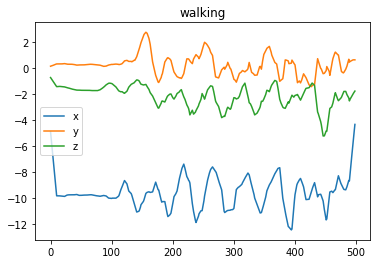

In [21]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

temp = []
tempx = []
tempy = []
tempz = []
xrun = []
yrun = []
zrun = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x = np.array(tempx)
    y = np.array(tempy)
    z = np.array(tempz)
    
    xrun.append(movingaverage(x,20))
    yrun.append(movingaverage(y,20))
    zrun.append(movingaverage(z,20))
    tempx = []
    tempy = []
    tempz = []
print(len(x))
t_sit = range(len(xrun[0]))
plt.hold('on')
plt.plot(t_sit, xrun[0], t_sit, yrun[0], t_sit, zrun[0])
plt.legend(['x', 'y', 'z'])
plt.title('walking')
plt.hold('off')

print(len(xrun[0]))
df.insert(35, "running x", xrun)
df.insert(36, "running y", yrun)
df.insert(37, "running z", zrun)

In [22]:
temp = []
tempx = []
tempy = []
tempz = []
x = []
y = []
z = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
   
    
    x.append(tempx)
    y.append(tempy)
    z.append(tempz)
    tempx = []
    tempy = []
    tempz = []
print(len(x))
print(len(y))
print(len(z))
df.insert(3, "x", x)
df.insert(4, "y", y)
df.insert(5, "z", z)

566
566
566


C:\Users\dsaffo\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\dsaffo\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\dsaffo\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\Users\dsaffo\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


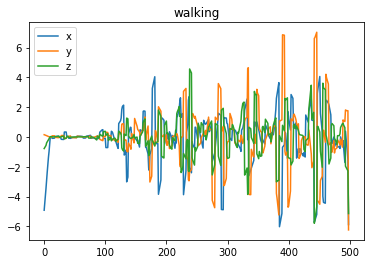

In [23]:

x = df['x'] - df['running x']
y = df['y'] - df['running y']
z = df['z'] - df['running z']

t_sit = range(len(x[0]))
plt.hold('on')
plt.plot(t_sit, x[0], t_sit, y[0], t_sit, z[0])
plt.legend(['x', 'y', 'z'])
plt.title('walking')
plt.hold('off')

df.insert(41, "x noise", x)
df.insert(42, "y noise", y)
df.insert(43, "z noise", z)

In [24]:

df['x noise min'] = df.apply(lambda row: min(row['x noise']), axis=1)
df['y noise min'] = df.apply(lambda row: min(row['y noise']), axis=1) 
df['z noise min'] = df.apply(lambda row: min(row['z noise']), axis=1) 

In [25]:
df['x noise max'] = df.apply(lambda row: max(row['x noise']), axis=1) 
df['y noise max'] = df.apply(lambda row: max(row['y noise']), axis=1) 
df['z noise max'] = df.apply(lambda row: max(row['z noise']), axis=1) 

In [26]:
df['x noise std'] = df.apply(lambda row: np.std(row['x noise']), axis=1) 
df['y noise std'] = df.apply(lambda row: np.std(row['y noise']), axis=1) 
df['z noise std'] = df.apply(lambda row: np.std(row['z noise']), axis=1) 

In [83]:
df['x fft min'] = df.apply(lambda row: min(abs(np.fft.fft(row['x']))), axis = 1)
df['y fft min'] = df.apply(lambda row: min(abs(np.fft.fft(row['y']))), axis = 1)
df['z fft min'] = df.apply(lambda row: min(abs(np.fft.fft(row['z']))), axis = 1)

In [85]:
df['x fft max'] = df.apply(lambda row: max(abs(np.fft.fft(row['x']))), axis = 1)
df['y fft max'] = df.apply(lambda row: max(abs(np.fft.fft(row['y']))), axis = 1)
df['z fft max'] = df.apply(lambda row: max(abs(np.fft.fft(row['z']))), axis = 1)

In [87]:
df['x fft std'] = df.apply(lambda row: np.std(abs(np.fft.fft(row['x']))), axis = 1)
df['y fft std'] = df.apply(lambda row: np.std(abs(np.fft.fft(row['y']))), axis = 1)
df['z fft std'] = df.apply(lambda row: np.std(abs(np.fft.fft(row['z']))), axis = 1)

In [89]:
df['x fft mean'] = df.apply(lambda row: np.mean(abs(np.fft.fft(row['x']))), axis = 1)
df['y fft mean'] = df.apply(lambda row: np.mean(abs(np.fft.fft(row['y']))), axis = 1)
df['z fft mean'] = df.apply(lambda row: np.mean(abs(np.fft.fft(row['z']))), axis = 1)

In [91]:
df['x fft median'] = df.apply(lambda row: np.median(abs(np.fft.fft(row['x']))), axis = 1)
df['y fft median'] = df.apply(lambda row: np.median(abs(np.fft.fft(row['y']))), axis = 1)
df['z fft median'] = df.apply(lambda row: np.median(abs(np.fft.fft(row['z']))), axis = 1)

In [92]:
df.head(1)

,0,1,2,x,y,z,magnitude,max,min,std,...,z fft max,x fft std,y fft std,z fft std,x fft mean,y fft mean,z fft mean,x fft median,y fft median,z fft median
0,gia,walking,"[[-9.8, 0.3, -1.5], [-9.8, 0.3, -1.5], [-9.8, ...","[-9.8, -9.8, -9.8, -9.8, -9.7, -9.7, -9.7, -9....","[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, ...","[-1.5, -1.5, -1.5, -1.5, -1.4, -1.4, -1.4, -1....","[9.918669265581952, 9.918669265581952, 9.91866...",19.460987,5.989157,2.138958,...,1079.2,216.656616,32.51747,54.208134,37.885761,30.626037,26.74132,17.115459,18.70638,15.332066


In [93]:
df.to_csv('SimTodActData.csv')